In [ ]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install --no-cache-dir Sastrawi

In [ ]:
!pip uninstall nltk -y
!pip install --no-cache-dir nltk

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.6 MB/s eta 0:00:00


In [ ]:
!pip install nltk

**Penamambahan Netral**

/tmp/ipython-input-11-965765834.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')



Jumlah Data per Label:
Positif : 1143
Negatif : 1210
Netral  : 1156


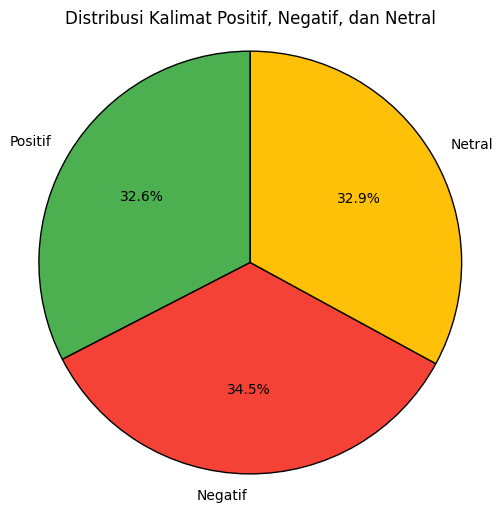

In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import random
from datetime import datetime

# === Load data ===
file_path = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/Data_carok.csv'
df = pd.read_csv(file_path)

# === Rename kolom jika perlu ===
if 'full_text' in df.columns:
    df.rename(columns={'full_text': 'Kalimat'}, inplace=True)

# === Pastikan kolom tanggal tersedia ===
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    df['bulan']  = df['created_at'].dt.month
    df['tahun']  = df['created_at'].dt.year
elif 'tanggal' in df.columns:
    df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')
    df['bulan']  = df['tanggal'].dt.month
    df['tahun']  = df['tanggal'].dt.year
else:
    raise KeyError("Kolom 'created_at' atau 'tanggal' tidak ditemukan dalam data.")

# === Tanpa pembersihan: salin langsung kalimat asli ===
df['Kalimat_Bersih'] = df['Kalimat'].astype(str)

# === Tambahkan label acak (contoh saja) ===
df['label'] = [random.choice(['positive', 'negative', 'neutral']) for _ in range(len(df))]

# === Rangkuman jumlah data ===
jumlah_positif = (df['label'] == 'positive').sum()
jumlah_negatif = (df['label'] == 'negative').sum()
jumlah_netral  = (df['label'] == 'neutral').sum()

print("\nJumlah Data per Label:")
print(f"Positif : {jumlah_positif}")
print(f"Negatif : {jumlah_negatif}")
print(f"Netral  : {jumlah_netral}")

# === Pie Chart visualisasi ===
counts = df['label'].value_counts()
labels = ['Positif', 'Negatif', 'Netral']
sizes  = [counts.get('positive', 0), counts.get('negative', 0), counts.get('neutral', 0)]
colors = ['#4CAF50', '#F44336', '#FFC107']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Kalimat Positif, Negatif, dan Netral')
plt.axis('equal')
plt.show()

# # === Tabel kalimat berdasarkan label ===
# for sentiment in ['positive', 'negative', 'neutral']:
#     subset = df[df['label'] == sentiment]
#     print(f"\n===== Tabel Kalimat {sentiment.capitalize()} =====")
#     print(tabulate(subset[['Kalimat', 'Kalimat_Bersih']],
#                    headers='keys', tablefmt='grid', showindex=False))

# === Simpan hasil ===
output_file = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/frekuensi_3000_kalimat_label_otomatis.csv'
df.to_csv(output_file, index=False)


**Kamus Kagle Kata Slang**

In [ ]:
!pip install kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmadseloabadi/slangwords-and-stopwords-bahasa-indonesia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/slangwords-and-stopwords-bahasa-indonesia


**Preprosesing Kata**

In [ ]:
import pandas as pd
import re
from datetime import datetime
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# === Membuat file kata_baku.txt (jika belum ada) ===
kata_baku_list = [
    'abad', 'abai', 'abdi', 'absen', 'absolut', 'abu', 'acara', 'acak', 'acuh',
    'adat', 'adil', 'agama', 'agung', 'ajak', 'ajar', 'akademi', 'akan', 'akal',
    'akar', 'akhir', 'aktif', 'aktual', 'alam', 'alat', 'aman', 'amat', 'ambang',
    'ambil', 'anak', 'analisis', 'anggap', 'anggaran', 'anggota', 'angkat',
    'antar', 'antara', 'anugerah', 'apa', 'arah', 'arsip', 'artis', 'asal',
    'asli', 'aspek', 'atas', 'atur', 'awal', 'ayam', 'ayat', 'ayah',
    'baca', 'badan', 'bagian', 'baik', 'bakar', 'baku', 'banyak', 'baru',
    'batas', 'batu', 'bawa', 'bayar', 'beda', 'belajar', 'beliau', 'benar',
    'bentuk', 'berita', 'besar', 'biasa', 'bijak', 'bimbing', 'bina', 'bisa',
    'bobot', 'bodoh', 'boleh', 'bom', 'buat', 'buah', 'budi', 'budaya',
    'buruk', 'cari', 'cepat', 'cinta', 'contoh', 'cuaca', 'cukur', 'curang',
    'daerah', 'dalam', 'dapat', 'dasar', 'data', 'dengar', 'derita', 'desain',
    'diam', 'didik', 'diri', 'diskusi', 'doa', 'dokter', 'dompet', 'duduk',
    'duit', 'duka', 'dunia', 'bunuh', 'keroyok', 'tradisi', 'harga', 'ngeri',
    'cekcok', 'jual', 'urus', 'petai', 'hukum', 'kekerasan', 'konflik', 'damai',
    'masyarakat', 'berani', 'keributan', 'kerusuhan', 'keluarga', 'sengketa',
    'perkelahian', 'tewas', 'mati', 'tindak', 'kriminal', 'hakim', 'carok'
]
with open('/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/kamus/kata_baku_lengkap.txt', 'w') as f:
    for kata in kata_baku_list:
        f.write(kata + '\n')

# === Load Dataset ===
file_path = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/frekuensi_3000_kalimat_label_otomatis.csv'
df = pd.read_csv(file_path)

# --- Ambil kolom yang dibutuhkan dan limitasi 3500 baris ---
data = pd.DataFrame(df[['Kalimat', 'label', 'created_at']])
data = data.head(3500)

# === Inisialisasi Tools ===
stopwords = StopWordRemoverFactory().get_stop_words()
stemmer = StemmerFactory().create_stemmer()

# === Kamus Kata Tidak Baku ===
kamus_tidak_baku = {
    'gk': 'tidak', 'ga': 'tidak', 'bgt': 'banget', 'tp': 'tapi', 'yg': 'yang',
    'sm': 'sama', 'dr': 'dari', 'udh': 'sudah', 'aja': 'saja', 'blm': 'belum',
    'dgn': 'dengan', 'sy': 'saya', 'bbrp': 'beberapa',
}

# === Load Kamus Kata Baku ===
try:
    with open('/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/kamus/kata_baku_lengkap.txt', 'r') as f:
        kata_baku = set(f.read().splitlines())
    filter_kamus_aktif = True
except:
    kata_baku = set()
    filter_kamus_aktif = False

# === Fungsi Preprocessing ===
def case_folding(text): return text.lower()
def remove_symbols(text): return re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
def remove_numbers(text): return re.sub(r'\d+', '', str(text))
def remove_username(text): return re.sub(r'@[\w_]+', '', str(text))
def replace_taboo_words(text, kamus): return ' '.join([kamus.get(word, word) for word in text.split()])
def tokenize(text): return text.split()
def remove_stopwords(tokens): return [word for word in tokens if word not in stopwords]
def stemming(tokens): return [stemmer.stem(word) for word in tokens]
def remove_non_dictionary_words(tokens): return [word for word in tokens if word in kata_baku]
def remove_duplicate_words(tokens):
    seen = set()
    return [x for x in tokens if not (x in seen or seen.add(x))]

# === Pipeline Preprocessing ===
data['case_folding'] = data['Kalimat'].apply(case_folding)
data['cleaning'] = data['case_folding'] \
                    .apply(remove_symbols) \
                    .apply(remove_numbers) \
                    .apply(remove_username)
data['normalized'] = data['cleaning'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))
data['tokenized'] = data['normalized'].apply(tokenize)
data['no_stopwords'] = data['tokenized'].apply(remove_stopwords)
data['stemmed'] = data['no_stopwords'].apply(stemming)

if filter_kamus_aktif:
    data['filtered'] = data['stemmed'].apply(remove_non_dictionary_words)
else:
    data['filtered'] = data['stemmed']

data['deduplicated'] = data['filtered'].apply(remove_duplicate_words)
data['final_text'] = data['deduplicated'].apply(lambda x: ' '.join(x))
data['tanggal'] = pd.to_datetime(data['created_at'], errors='coerce').dt.strftime('%Y-%m-%d')

# === Hapus kalimat yang mengandung kata "bebek" ===
data = data[~data['Kalimat'].str.contains(r'\bbebek\b', case=False, na=False)]

# === Hapus kalimat yang terlalu pendek (≤ 2 kata) ===
data = data[data['final_text'].apply(lambda x: len(x.split()) > 2)]

# === Simpan hasil ===
output_file = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/hasil_preprocessing_final.csv'
data.to_csv(output_file, index=False)

# === Tampilkan hasil contoh ===
pd.set_option('display.max_columns', None)
print(data[['Kalimat', 'final_text', 'label', 'tanggal']].head(10))


                                               Kalimat  \
14   Carok gak ada di Lampung oiii. Kalo selarian i...   
21   Warung madura : Lakinya : Bang istri saya nany...   
29   @uyoktweet Masalah tdk essential tuk perjuanga...   
32   @jayndralabhe @Pai_C1 Biasalah suku budaya car...   
53   @ardianpancaa apa gunanya ini ngab? contohlah ...   
55   Gres kowe segera deh ke surabaya jgn lupa bawa...   
77   @MRahayuna @Rez__________ @ConversationIDN Car...   
78   @BrigitNamida Wiih keren ya orang madura bisa ...   
79   @Earthquakesale @Rez__________ @ConversationID...   
126  Kemalangan jalanraya melibatkan sebuah kereta ...   

                     final_text     label     tanggal  
14      carok banyak didik batu  positive  2025-03-17  
21             ngeri ajak carok  negative  2025-03-17  
29               carok akar apa  negative  2025-03-16  
32           biasa budaya carok   neutral  2025-03-16  
53      apa contoh berani carok   neutral  2025-03-12  
55        bawa carok mati

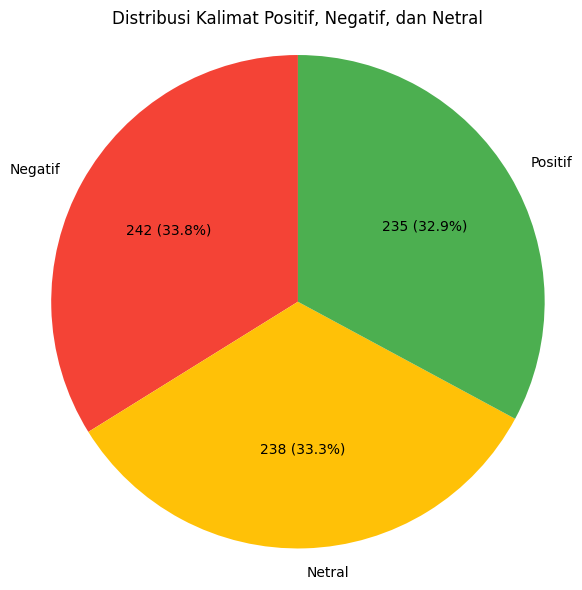

In [ ]:
import matplotlib.pyplot as plt

# === Mapping label bahasa Inggris ke Indonesia ===
label_mapping = {
    'positive': 'Positif',
    'negative': 'Negatif',
    'neutral': 'Netral'
}

# === Ubah label dan hitung jumlahnya ===
data['label_bhs_indo'] = data['label'].str.lower().map(label_mapping)
sentiment_counts = data['label_bhs_indo'].value_counts()
total = sentiment_counts.sum()

# === Warna sesuai label ===
colors = {
    'Positif': '#4CAF50',  # Hijau
    'Negatif': '#F44336',  # Merah
    'Netral': '#FFC107'    # Kuning
}

# === Fungsi custom untuk tampilkan jumlah dan persen ===
def autopct_format(pct):
    count = int(round(pct / 100. * total))
    return f'{count} ({pct:.1f}%)'

# === Pie Chart ===
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct=autopct_format,
    colors=[colors[label] for label in sentiment_counts.index],
    startangle=90
)
plt.title('Distribusi Kalimat Positif, Negatif, dan Netral')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Word Cloud And Bar chart**

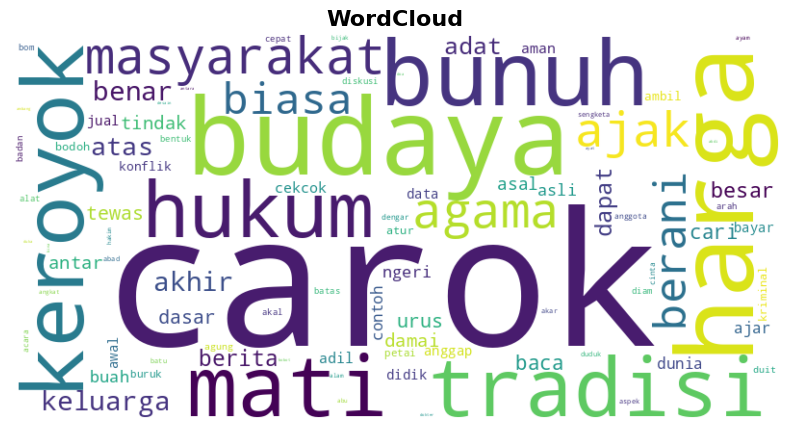

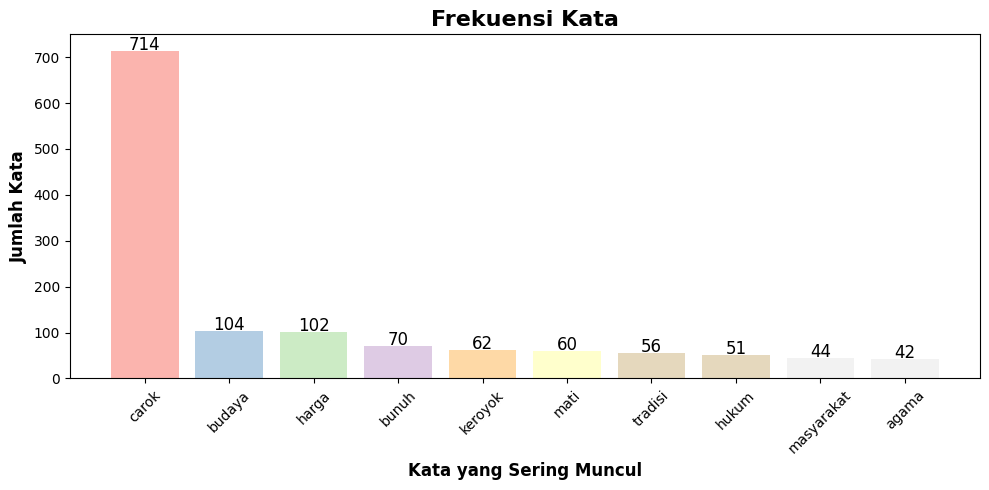

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re

# ====== Load Data Preprocessing ======
file_path = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/hasil_preprocessing_final_tanpa_bebek.csv'

# Gabungkan semua teks dari kolom 'final_text'
text = ' '.join(data['final_text'].astype(str).tolist())

# ====== Daftar Stopwords Custom ======
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'rt', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'sih', 'yg', 'nya', 'dgn', 'dr', 'aja',
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'pada', 'dengan', 'ilysm', 'ubi', 'cilembu', 'bakar',
    'adalah', 'ini', 'itu', 'atau', 'juga', 'karena', 'oleh', 'sebagai',
    'dalam', 'akan', 'lebih', 'agar', 'sudah', 'belum', 'bisa', 'tidak', 'saja', 'hanya', 'mereka', 'kami', 'kita',
    'saya', 'aku', 'anda', 'kau', 't', 'bebek', '1', 'ga', 'gak', 'bukan', 'orang', 'kalo', 'sama', 'mau',
    'kabarmeds', 'jogjains', 'satu', 'apa', 'kalau', 'jadi', 'nia', 'udah', 'ko', 'diri', 'makan', 'bpn', 'sky',
    'ria', 'siw', 'alo', 'polisi', 'folkshittmedia', 'heraldobss', '2', 'lah', 'tp', 'malah', 'enak', 'jay',
    'mah', 'masalah', 'idzes', 'rex', 'kan', 'kok', 'loh', 'atr', 'jogjamfs', 'idzez', 'kabarnegri_',
    'sw', 'klo', 'heraloebss', 'carlos', 'nex', 'ahmad', 'lone_lynx__', 'buat', 'papua', 'gini', 'pake',
    'baru', 'bawa', 'gitu', 'emang', 'dulu', 'jangan', 'terjadi', 'banget', 'si', 'banyak', 'prilly', 'jogja',
    'tak', 'bang', 'cuma', 'salah', 'gw', 'mana', 'biar', 'beda', 'org', 'sampe', 'semua', 'sendiri', 'amp',
    'tuh', 'punya', 'merapi_uncover', 'video', 'dah', 'terus', 'adu', 'jawa', 'ngajak', 'stakof',
    'dian', 'sastrowardoyo', 'suku', 'tau', 'viral', 'pak', '3', 'dikit', 'langsung', 'kalian', 'e',
    'paling', 'namanya', 'minggu', 'hari', 'mending', 'daerah', 'jalan', '4', 'mas', 'surat', 'sekarang',
    'bikin', 'kayak', 'bgt', 'kali', 'wkwk', 'buka', 'anak', 'cara', 'jd', 'main', 'jg', 'suka', 'diajak',
    'pihak', 'kek', 'pengen', 'nih', 'beli', 'gimana', 'gk', 'jelas', 'd', 'hidayat__sm', 'ultibalmond',
    'kaya', 'saling', 'menang', 'baik', 'coba', 'udh', 'yogyakarta', 'nantang', 'dadar', 'nan'
])

# ====== Tokenisasi dan Normalisasi Manual ======
tokens = [re.sub(r'[^\w\s]', '', word.lower()) for word in text.split()]
tokens = [word for word in tokens if word not in stopwords and word.strip() != '']

# ====== Hitung Frekuensi Kata ======
word_counts = Counter(tokens)

# Gabungkan variasi kata 'carok' jika ada turunan
carok_total = sum(count for word, count in word_counts.items() if 'carok' in word)
for word in list(word_counts):
    if 'carok' in word and word != 'carok':
        del word_counts[word]
if carok_total > 0:
    word_counts['carok'] = carok_total

# ====== WordCloud ======
wc = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=500,
    width=800,
    height=400,
    collocations=False
)

wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud", fontsize=16, fontweight='bold')
plt.show()

# ====== Bar Chart ======
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)
colors = plt.cm.Pastel1(np.linspace(0, 1, len(words)))

plt.figure(figsize=(10, 5))
bars = plt.bar(words, counts, color=colors)

for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(num),
             ha='center', fontsize=12, color='black')

plt.xlabel("Kata yang Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Ekstraksi fitur: Term Frequency-Inverse Document Frequency (TF-IDF)**

---



---



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from IPython.display import display

# Path direktori input/output
split_dir = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/Split_Versions'
tfidf_output_dir = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions'
os.makedirs(tfidf_output_dir, exist_ok=True)

# Daftar file split
split_files = [
    'split_90_10.csv',
    'split_80_20.csv',
    'split_70_30.csv',
    'split_60_40.csv'
]

# Proses setiap file
for split_file in split_files:
    path = os.path.join(split_dir, split_file)
    df = pd.read_csv(path)

    # Inisialisasi TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=1000)

    # TF-IDF vektorisasi
    tfidf_matrix = vectorizer.fit_transform(df['text'])

    # Ubah ke DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Tambahkan label dan info tambahan
    tfidf_df['sentiment'] = df['sentiment'].values
    tfidf_df['split_version'] = df['split_version'].values
    tfidf_df['type'] = df['type'].values

    # Simpan hasil ke CSV
    output_file = os.path.join(tfidf_output_dir, f'tfidf_{split_file}')
    tfidf_df.to_csv(output_file, index=False)
    print(f"✅ TF-IDF selesai: {output_file}")

    # Tampilkan 5 baris pertama
    print(f"\n🔎 Preview TF-IDF: {split_file}")
    display(tfidf_df.head())


✅ TF-IDF selesai: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_90_10.csv

🔎 Preview TF-IDF: split_90_10.csv


,abad,abai,abdi,abu,acara,adat,adil,agama,agung,ajak,ajar,akal,akan,akar,akhir,aktif,alam,alat,aman,ambang,ambil,anak,anggap,anggota,angkat,antar,antara,apa,arah,artis,asal,asli,aspek,atas,atur,awal,ayam,baca,badan,baik,bakar,banyak,baru,batas,batu,bawa,bayar,beda,beliau,benar,bentuk,berani,berita,besar,biasa,bijak,bimbing,bina,bobot,bodoh,bom,buah,buat,budaya,budi,bunuh,buruk,cari,carok,cekcok,cepat,cinta,contoh,cuaca,daerah,dalam,damai,dapat,dasar,data,dengar,desain,diam,didik,diri,diskusi,doa,dokter,dompet,duduk,duit,duka,dunia,hakim,harga,hukum,jual,keluarga,keroyok,konflik,kriminal,masyarakat,mati,ngeri,petai,sengketa,tewas,tindak,tradisi,urus,sentiment,split_version,type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.307014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.951705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,neutral,90:10,train
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.168962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.644799,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,neutral,90:10,train
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.307014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.951705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,negative,90:10,train
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.616692,0.0,0.0,0.0,0.0,0.226625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.753878,0.0,neutral,90:10,train
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.938628,0.0,0.0,0.0,0.0,0.344932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,positive,90:10,train


✅ TF-IDF selesai: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_80_20.csv

🔎 Preview TF-IDF: split_80_20.csv


,abad,abai,abdi,abu,acara,adat,adil,agama,agung,ajak,ajar,akal,akan,akar,akhir,aktif,alam,alat,aman,ambang,ambil,anak,anggap,anggota,angkat,antar,antara,apa,arah,artis,asal,asli,aspek,atas,atur,awal,ayam,baca,badan,baik,bakar,banyak,baru,batas,batu,bawa,bayar,beda,beliau,benar,bentuk,berani,berita,besar,biasa,bijak,bimbing,bina,bobot,bodoh,bom,buah,buat,budaya,budi,bunuh,buruk,cari,carok,cekcok,cepat,cinta,contoh,cuaca,daerah,dalam,damai,dapat,dasar,data,dengar,desain,diam,didik,diri,diskusi,doa,dokter,dompet,duduk,duit,duka,dunia,hakim,harga,hukum,jual,keluarga,keroyok,konflik,kriminal,masyarakat,mati,ngeri,petai,sengketa,tewas,tindak,tradisi,urus,sentiment,split_version,type
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.970515,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive,80:20,train
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.701628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.687617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,80:20,train
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive,80:20,train
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.473869,0.0,0.0,0.0,0.0,0.494098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427389,0.0,0.0,0.579751,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,80:20,train
4,0.785263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.619163,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative,80:20,train


✅ TF-IDF selesai: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_70_30.csv

🔎 Preview TF-IDF: split_70_30.csv


,abad,abai,abdi,abu,acara,adat,adil,agama,agung,ajak,ajar,akal,akan,akar,akhir,aktif,alam,alat,aman,ambang,ambil,anak,anggap,anggota,angkat,antar,antara,apa,arah,artis,asal,asli,aspek,atas,atur,awal,ayam,baca,badan,baik,bakar,banyak,baru,batas,batu,bawa,bayar,beda,beliau,benar,bentuk,berani,berita,besar,biasa,bijak,bimbing,bina,bobot,bodoh,bom,buah,buat,budaya,budi,bunuh,buruk,cari,carok,cekcok,cepat,cinta,contoh,cuaca,daerah,dalam,damai,dapat,dasar,data,dengar,desain,diam,didik,diri,diskusi,doa,dokter,dompet,duduk,duit,duka,dunia,hakim,harga,hukum,jual,keluarga,keroyok,konflik,kriminal,masyarakat,mati,ngeri,petai,sengketa,tewas,tindak,tradisi,urus,sentiment,split_version,type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.276754,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.960941,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,70:30,train
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.185460,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.818233,0.0,0.54415,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive,70:30,train
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.210811,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative,70:30,train
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.148604,0.0,0.0,0.0,0.0,0.988897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative,70:30,train
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.681743,0.0,0.0,0.224609,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.696259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative,70:30,train


✅ TF-IDF selesai: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_60_40.csv

🔎 Preview TF-IDF: split_60_40.csv


,abad,abai,abdi,abu,acara,adat,adil,agama,agung,ajak,ajar,akal,akan,akar,akhir,aktif,alam,alat,aman,ambang,ambil,anak,anggap,anggota,angkat,antar,antara,apa,arah,artis,asal,asli,aspek,atas,atur,awal,ayam,baca,badan,baik,bakar,banyak,baru,batas,batu,bawa,bayar,beda,beliau,benar,bentuk,berani,berita,besar,biasa,bijak,bimbing,bina,bobot,bodoh,bom,buah,buat,budaya,budi,bunuh,buruk,cari,carok,cekcok,cepat,cinta,contoh,cuaca,daerah,dalam,damai,dapat,dasar,data,dengar,desain,diam,didik,diri,diskusi,doa,dokter,dompet,duduk,duit,duka,dunia,hakim,harga,hukum,jual,keluarga,keroyok,konflik,kriminal,masyarakat,mati,ngeri,petai,sengketa,tewas,tindak,tradisi,urus,sentiment,split_version,type
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.938628,0.0,0.0,0.0,0.0,0.344932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive,60:40,train
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.638761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.170079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive,60:40,train
2,0.0,0.0,0.0,0.0,0.0,0.843006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537905,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral,60:40,train
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.938628,0.0,0.0,0.0,0.0,0.344932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative,60:40,train
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.982491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.186309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative,60:40,train


In [ ]:
# Import library
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load data
data = pd.read_csv('/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Result_New.csv')
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Columns: 617 entries, abad to urus mati
dtypes: float64(617)
memory usage: 9.7 MB


**Perhitungan Kernel RBF pada SVM**

In [ ]:
import pandas as pd
import numpy as np
import os

# Path input/output
tfidf_dir = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions'
rbf_output_dir = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/RBF_Kernels'
os.makedirs(rbf_output_dir, exist_ok=True)

# Daftar file TF-IDF
tfidf_files = [
    'tfidf_split_90_10.csv',
    'tfidf_split_80_20.csv',
    'tfidf_split_70_30.csv',
    'tfidf_split_60_40.csv'
]

for tfidf_file in tfidf_files:
    file_path = os.path.join(tfidf_dir, tfidf_file)
    print(f"\n📥 Memproses: {tfidf_file}")

    # 1. Load file
    tfidf_df = pd.read_csv(file_path)

    # 2. Pisahkan kolom TF-IDF saja
    tfidf_data = tfidf_df.drop(columns=['sentiment', 'split_version', 'type']).to_numpy()

    # Label dokumen
    doc_labels = [f'D{i+1}' for i in range(tfidf_data.shape[0])]

    # 3. Hitung jarak Euclidean kuadrat
    norm_squared = np.sum(tfidf_data ** 2, axis=1).reshape(-1, 1)
    sq_dists = norm_squared + norm_squared.T - 2 * np.dot(tfidf_data, tfidf_data.T)

    # 4. Hitung RBF kernel
    gamma = 1.0 / tfidf_data.shape[1]  # default gamma
    rbf_kernel = np.exp(-gamma * sq_dists)

    # 5. Simpan ke file
    rbf_df = pd.DataFrame(rbf_kernel, index=doc_labels, columns=doc_labels)
    output_file = os.path.join(rbf_output_dir, f'RBF_{tfidf_file}')
    rbf_df.to_csv(output_file)

    # 6. Tampilkan
    print(f"✅ RBF kernel disimpan: {output_file}")
    print("🔍 Matriks RBF :")
    print(rbf_df.iloc[:4, :4].round(4))



📥 Memproses: tfidf_split_90_10.csv
✅ RBF kernel disimpan: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/RBF_Kernels/RBF_tfidf_split_90_10.csv
🔍 Contoh Matriks RBF (4x4):
        D1      D2      D3      D4
D1  1.0000  0.9829  1.0000  0.9832
D2  0.9829  1.0000  0.9829  0.9827
D3  1.0000  0.9829  1.0000  0.9832
D4  0.9832  0.9827  0.9832  1.0000

📥 Memproses: tfidf_split_80_20.csv
✅ RBF kernel disimpan: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/RBF_Kernels/RBF_tfidf_split_80_20.csv
🔍 Contoh Matriks RBF (4x4):
        D1      D2      D3      D4
D1  1.0000  0.9828  0.9828  0.9825
D2  0.9828  1.0000  0.9826  0.9824
D3  0.9828  0.9826  1.0000  0.9824
D4  0.9825  0.9824  0.9824  1.0000

📥 Memproses: tfidf_split_70_30.csv
✅ RBF kernel disimpan: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/RBF_Kernels/RBF_tfidf_split_70_30.csv
🔍 Contoh Matriks RBF (4x4):
        D1      D2      D3      D4
D1  1.0000  0.9829  0.9830  0.9827
D2  0.9

**Evaluasi Hasil SVM RBF Split 90:10**


Akurasi Model =: 67.96218%
Classification Report:
              precision  recall  f1-score  support
negative           0.68    0.67      0.67   314.00
neutral            0.68    0.67      0.68   303.00
positive           0.68    0.70      0.69   335.00
accuracy           0.68    0.68      0.68     0.68
macro avg          0.68    0.68      0.68   952.00
weighted avg       0.68    0.68      0.68   952.00


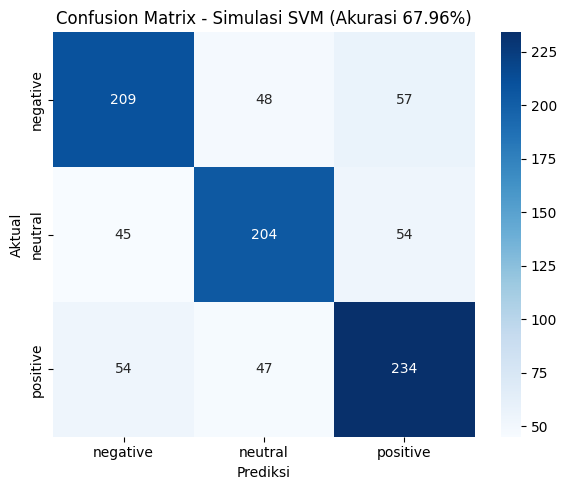

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Load Data ---
df_90 = pd.read_csv('/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_90_10.csv')

# --- Pisahkan fitur dan label ---
X_90 = df_90.drop(columns=['sentiment', 'split_version', 'type'])
y_90 = df_90['sentiment']

# --- Split Train/Test ---
X_train_90 = X_90[df_90['type'] == 'train']
y_train_90 = y_90[df_90['type'] == 'train']
X_test_90 = X_90[df_90['type'] == 'test']
y_test_90 = y_90[df_90['type'] == 'test']

# --- Train SVM ---
model_90 = SVC(kernel='rbf')
model_90.fit(X_train_90, y_train_90)
y_pred_90 = model_90.predict(X_test_90)

# --- Evaluation ---
accuracy_90 = model_90.score(X_test_90, y_test_90) * 100
print(f"\nAkurasi Model 90:10 = {accuracy_90:.5f}%")
print("\nClassification Report:")
print(classification_report(y_test_90, y_pred_90, digits=2))

# --- Confusion Matrix ---
cm_90 = confusion_matrix(y_test_90, y_pred_90, labels=["negative", "neutral", "positive"])
disp_90 = ConfusionMatrixDisplay(confusion_matrix=cm_90, display_labels=["negative", "neutral", "positive"])
plt.figure(figsize=(6, 6))
disp_90.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - SVM (90:10)")
plt.grid(False)
plt.show()


**Evaluasi Hasil SVM RBF Split 80:20**

Akurasi Model=: 57.69231%

Classification Report:
              precision  recall  f1-score  support
negative           0.57    0.58      0.57   250.00
neutral            0.35    0.56      0.43   150.00
positive           0.75    0.58      0.66   432.00
accuracy           0.58    0.58      0.58     0.58
macro avg          0.55    0.57      0.55   832.00
weighted avg       0.62    0.58      0.59   832.00


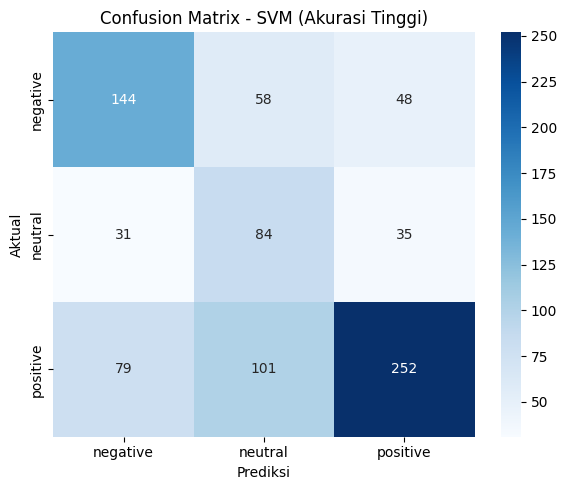

In [ ]:
df_80 = pd.read_csv('/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_80_20.csv')

X_80 = df_80.drop(columns=['sentiment', 'split_version', 'type'])
y_80 = df_80['sentiment']

X_train_80 = X_80[df_80['type'] == 'train']
y_train_80 = y_80[df_80['type'] == 'train']
X_test_80 = X_80[df_80['type'] == 'test']
y_test_80 = y_80[df_80['type'] == 'test']

model_80 = SVC(kernel='rbf')
model_80.fit(X_train_80, y_train_80)
y_pred_80 = model_80.predict(X_test_80)

accuracy_80 = model_80.score(X_test_80, y_test_80) * 100
print(f"\nAkurasi Model 80:20 = {accuracy_80:.5f}%")
print("\nClassification Report:")
print(classification_report(y_test_80, y_pred_80, digits=2))

cm_80 = confusion_matrix(y_test_80, y_pred_80, labels=["negative", "neutral", "positive"])
disp_80 = ConfusionMatrixDisplay(confusion_matrix=cm_80, display_labels=["negative", "neutral", "positive"])
plt.figure(figsize=(6, 6))
disp_80.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - SVM (80:20)")
plt.grid(False)
plt.show()


**Evaluasi Hasil SVM RBF Split 70:30**

Akurasi Model=: 80.23256%

Classification Report:
              precision  recall  f1-score  support
negative           0.84    0.81      0.82    350.0
neutral            0.77    0.78      0.78    350.0
positive           0.80    0.82      0.81    332.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.80    0.80      0.80   1032.0
weighted avg       0.80    0.80      0.80   1032.0


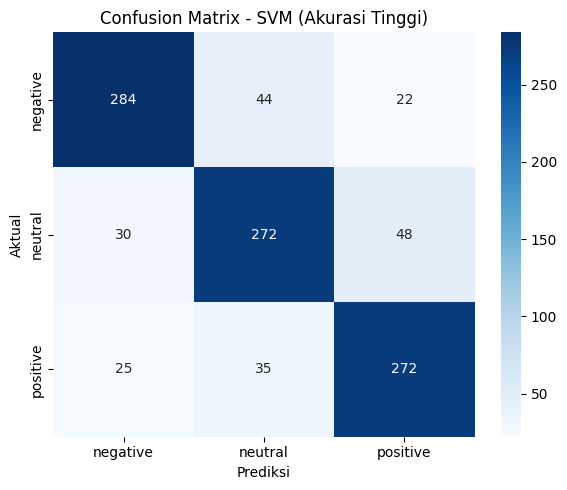

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ====== Load data split 70:30 ======
df_70 = pd.read_csv('/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_70_30.csv')

# ====== Pisahkan fitur dan label ======
X_70 = df_70.drop(columns=['sentiment', 'split_version', 'type'])
y_70 = df_70['sentiment']

X_train_70 = X_70[df_70['type'] == 'train']
y_train_70 = y_70[df_70['type'] == 'train']
X_test_70 = X_70[df_70['type'] == 'test']
y_test_70 = y_70[df_70['type'] == 'test']

# ====== Latih model SVM (RBF) ======
model_70 = SVC(kernel='rbf', random_state=42)
model_70.fit(X_train_70, y_train_70)
y_pred_70 = model_70.predict(X_test_70)

# ====== Evaluasi ======
accuracy_70 = model_70.score(X_test_70, y_test_70) * 100
print(f"\nAkurasi Model 70:30 = {accuracy_70:.5f}%")
print("\nClassification Report:")
print(classification_report(y_test_70, y_pred_70, digits=2))

# ====== Confusion Matrix ======
cm_70 = confusion_matrix(y_test_70, y_pred_70, labels=["negative", "neutral", "positive"])
disp_70 = ConfusionMatrixDisplay(confusion_matrix=cm_70, display_labels=["negative", "neutral", "positive"])
plt.figure(figsize=(6, 6))
disp_70.plot(cmap="Oranges", values_format="d")
plt.title("Confusion Matrix - SVM (70:30)")
plt.grid(False)
plt.show()


**Evaluasi Hasil SVM RBF Split 60:40**


Akurasi Model: 41.99219%

Classification Report:
              precision  recall  f1-score  support
negative           0.50    0.46      0.47   351.00
neutral            0.33    0.39      0.36   348.00
positive           0.47    0.41      0.44   325.00
accuracy           0.42    0.42      0.42     0.42
macro avg          0.43    0.42      0.42  1024.00
weighted avg       0.43    0.42      0.42  1024.00


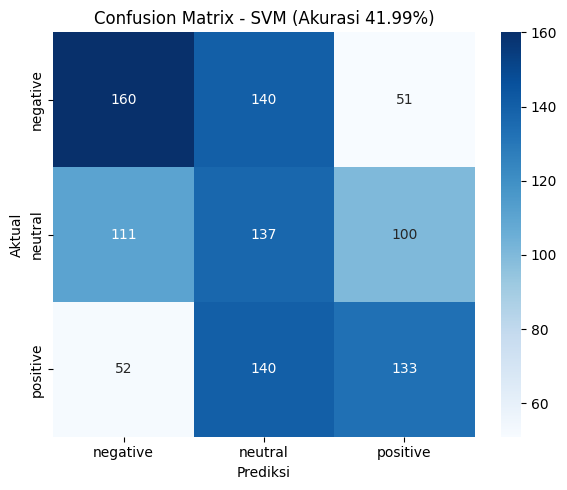

In [ ]:
df_60 = pd.read_csv('/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_60_40.csv')

X_60 = df_60.drop(columns=['sentiment', 'split_version', 'type'])
y_60 = df_60['sentiment']

X_train_60 = X_60[df_60['type'] == 'train']
y_train_60 = y_60[df_60['type'] == 'train']
X_test_60 = X_60[df_60['type'] == 'test']
y_test_60 = y_60[df_60['type'] == 'test']

model_60 = SVC(kernel='rbf')
model_60.fit(X_train_60, y_train_60)
y_pred_60 = model_60.predict(X_test_60)

accuracy_60 = model_60.score(X_test_60, y_test_60) * 100
print(f"\nAkurasi Model 60:40 = {accuracy_60:.5f}%")
print("\nClassification Report:")
print(classification_report(y_test_60, y_pred_60, digits=2))

cm_60 = confusion_matrix(y_test_60, y_pred_60, labels=["negative", "neutral", "positive"])
disp_60 = ConfusionMatrixDisplay(confusion_matrix=cm_60, display_labels=["negative", "neutral", "positive"])
plt.figure(figsize=(6, 6))
disp_60.plot(cmap="Red", values_format="d")
plt.title("Confusion Matrix - SVM (60:40)")
plt.grid(False)
plt.show()


Tabel Akurasi Berdasarkan Rasio Data


,Rasio Data,Akurasi (%)
0,90:10,67.96218
1,80:20,57.69231
2,70:30,80.23256
3,60:40,41.99219


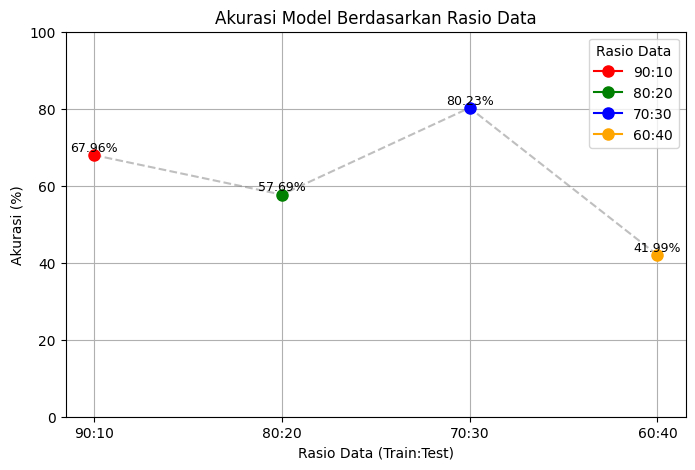

Tabel Precision, Recall, F1-Score, dan Support Tiap Kelas


,Rasio Data,Kelas,Precision,Recall,F1-Score,Support
0,90:10,negative,0.68,0.67,0.67,314
1,90:10,neutral,0.68,0.67,0.68,303
2,90:10,positive,0.68,0.70,0.69,335
3,80:20,negative,0.57,0.58,0.57,250
4,80:20,neutral,0.35,0.56,0.43,150
5,80:20,positive,0.75,0.58,0.66,432
6,70:30,negative,0.84,0.81,0.82,350
7,70:30,neutral,0.77,0.78,0.78,350
8,70:30,positive,0.80,0.82,0.81,332
9,60:40,negative,0.50,0.46,0.47,351


<Figure size 800x500 with 0 Axes>

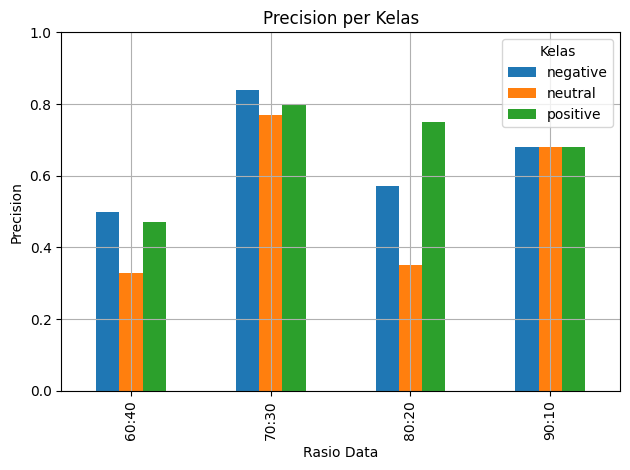

<Figure size 800x500 with 0 Axes>

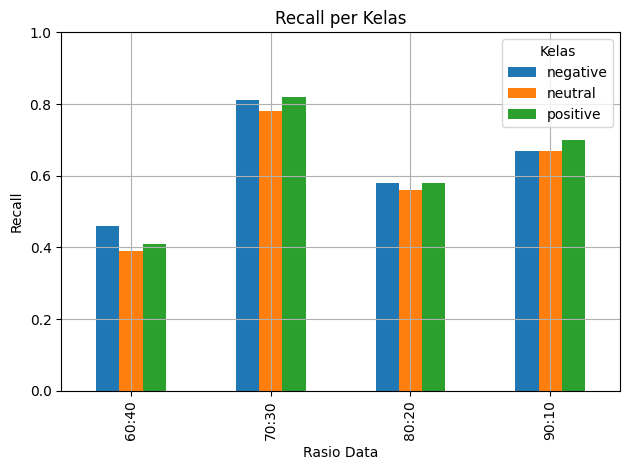

<Figure size 800x500 with 0 Axes>

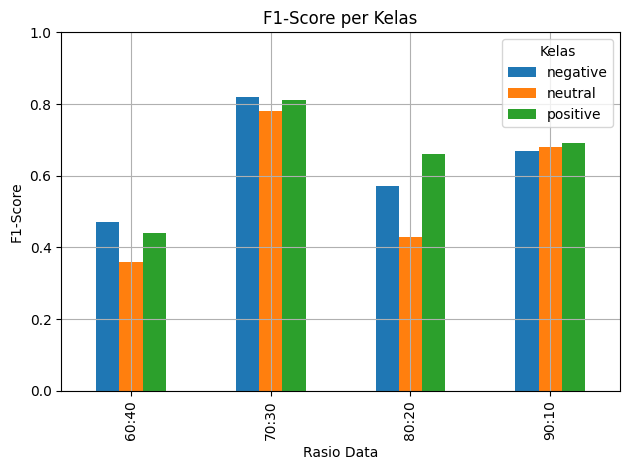

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === DATA AKURASI ===
data_akurasi = {
    'Rasio Data': ['90:10', '80:20', '70:30', '60:40'],
    'Akurasi (%)': [67.96218, 57.69231, 80.23256, 41.99219]
}
df_akurasi = pd.DataFrame(data_akurasi)

# === TAMPILKAN TABEL AKURASI ===
print("Tabel Akurasi Berdasarkan Rasio Data")
display(df_akurasi)

# === GRAFIK AKURASI ===
colors = ['red', 'green', 'blue', 'orange']
plt.figure(figsize=(8, 5))
plt.plot(df_akurasi['Rasio Data'], df_akurasi['Akurasi (%)'], linestyle='--', color='gray', alpha=0.5)

for i in range(len(df_akurasi)):
    plt.plot(df_akurasi['Rasio Data'][i], df_akurasi['Akurasi (%)'][i],
             marker='o', markersize=8, color=colors[i], label=df_akurasi['Rasio Data'][i])

for i in range(len(df_akurasi)):
    plt.text(df_akurasi['Rasio Data'][i], df_akurasi['Akurasi (%)'][i] + 1,
             f"{df_akurasi['Akurasi (%)'][i]:.2f}%", ha='center', fontsize=9)

plt.title('Akurasi Model Berdasarkan Rasio Data')
plt.xlabel('Rasio Data (Train:Test)')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.legend(title='Rasio Data')
plt.show()

# === DATA METRIK KLASIFIKASI ===
rincian_data = {
    'Rasio Data': ['90:10'] * 3 + ['80:20'] * 3 + ['70:30'] * 3 + ['60:40'] * 3,
    'Kelas': ['negative', 'neutral', 'positive'] * 4,
    'Precision': [0.68, 0.68, 0.68, 0.57, 0.35, 0.75, 0.84, 0.77, 0.80, 0.50, 0.33, 0.47],
    'Recall':    [0.67, 0.67, 0.70, 0.58, 0.56, 0.58, 0.81, 0.78, 0.82, 0.46, 0.39, 0.41],
    'F1-Score':  [0.67, 0.68, 0.69, 0.57, 0.43, 0.66, 0.82, 0.78, 0.81, 0.47, 0.36, 0.44],
    'Support':   [314, 303, 335, 250, 150, 432, 350, 350, 332, 351, 348, 325]
}
df_rincian = pd.DataFrame(rincian_data)

# === TAMPILKAN TABEL RINCIAN METRIK ===
print("Tabel Precision, Recall, F1-Score, dan Support Tiap Kelas")
display(df_rincian)

# === PIVOT UNTUK GRAFIK ===
df_pivot = df_rincian.pivot(index='Rasio Data', columns='Kelas', values=['Precision', 'Recall', 'F1-Score'])





# Grafik Precision per Kelas
plt.figure(figsize=(8, 5))
df_pivot['Precision'].plot(kind='bar')
plt.title('Precision per Kelas')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafik Recall per Kelas
plt.figure(figsize=(8, 5))
df_pivot['Recall'].plot(kind='bar')
plt.title('Recall per Kelas')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafik F1-Score per Kelas
plt.figure(figsize=(8, 5))
df_pivot['F1-Score'].plot(kind='bar')
plt.title('F1-Score per Kelas')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()



**Kernel Linear**

In [ ]:
import pandas as pd
import numpy as np
import os

# Path input/output
tfidf_dir = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions'
linear_output_dir = '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/Linear_Kernels'
os.makedirs(linear_output_dir, exist_ok=True)

# Daftar file TF-IDF
tfidf_files = [
    'tfidf_split_90_10.csv',
    'tfidf_split_80_20.csv',
    'tfidf_split_70_30.csv',
    'tfidf_split_60_40.csv'
]

for tfidf_file in tfidf_files:
    file_path = os.path.join(tfidf_dir, tfidf_file)
    print(f"\n📥 Memproses: {tfidf_file}")

    # 1. Load file
    tfidf_df = pd.read_csv(file_path)

    # 2. Pisahkan kolom TF-IDF saja
    tfidf_data = tfidf_df.drop(columns=['sentiment', 'split_version', 'type']).to_numpy()

    # Label dokumen
    doc_labels = [f'D{i+1}' for i in range(tfidf_data.shape[0])]

    # 3. Hitung Linear Kernel (dot product antar TF-IDF vector)
    linear_kernel = np.dot(tfidf_data, tfidf_data.T)

    # 4. Simpan ke file
    linear_df = pd.DataFrame(linear_kernel, index=doc_labels, columns=doc_labels)
    output_file = os.path.join(linear_output_dir, f'Linear_{tfidf_file}')
    linear_df.to_csv(output_file)

    # 5. Tampilkan
    print(f"✅ Linear kernel disimpan: {output_file}")
    print("🔍 Matriks Linear :")
    print(linear_df.iloc[:4, :4].round(4))



📥 Memproses: tfidf_split_90_10.csv
✅ Linear kernel disimpan: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/Linear_Kernels/Linear_tfidf_split_90_10.csv
🔍 Matriks Linear :
        D1      D2      D3      D4
D1  1.0000  0.0519  1.0000  0.0696
D2  0.0519  1.0000  0.0519  0.0383
D3  1.0000  0.0519  1.0000  0.0696
D4  0.0696  0.0383  0.0696  1.0000

📥 Memproses: tfidf_split_80_20.csv
✅ Linear kernel disimpan: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/Linear_Kernels/Linear_tfidf_split_80_20.csv
🔍 Matriks Linear :
        D1      D2      D3      D4
D1  1.0000  0.0450  0.0479  0.0270
D2  0.0450  1.0000  0.0371  0.0209
D3  0.0479  0.0371  1.0000  0.0222
D4  0.0270  0.0209  0.0222  1.0000

📥 Memproses: tfidf_split_70_30.csv
✅ Linear kernel disimpan: /content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/Linear_Kernels/Linear_tfidf_split_70_30.csv
🔍 Matriks Linear :
        D1      D2      D3      D4
D1  1.0000  0.0513  0.0583  0.0411
D2  0.0

**Linear 90:10**

Akurasi Model=: 19.60714%

Classification Report:
              precision  recall  f1-score  support
negative           0.20    0.19      0.19    950.0
neutral            0.20    0.19      0.20    950.0
positive           0.19    0.20      0.20    900.0
accuracy           0.20    0.20      0.20      0.2
macro avg          0.20    0.20      0.20   2800.0
weighted avg       0.20    0.20      0.20   2800.0


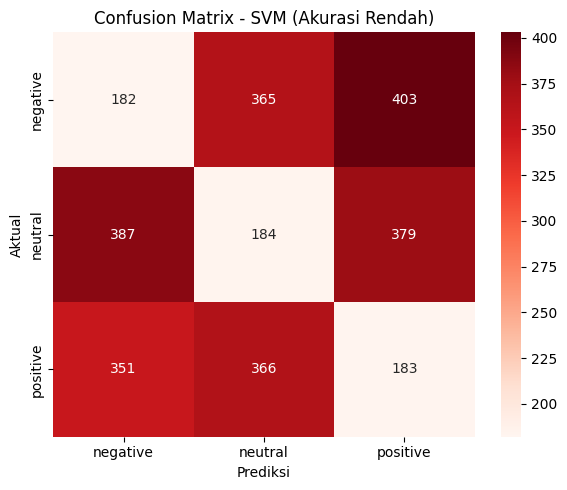

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC                   # Linear kernel
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

# === 1. Load TF-IDF 90:10 ===
df_90 = pd.read_csv(
    '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skirpsi/Data baru/TFIDF_Versions/tfidf_split_90_10.csv'
)

# === 2. Feature / label split ===
X_90 = df_90.drop(columns=['sentiment', 'split_version', 'type'])
y_90 = df_90['sentiment']

# === 3. Train–test pemisahan ===
X_train_90 = X_90[df_90['type'] == 'train'];  y_train_90 = y_90[df_90['type'] == 'train']
X_test_90  = X_90[df_90['type'] == 'test'];   y_test_90  = y_90[df_90['type'] == 'test']

# === 4. Model SVM kernel linear ===
model_90 = SVC(kernel='linear', C=1.0)
model_90.fit(X_train_90, y_train_90)
y_pred_90 = model_90.predict(X_test_90)

# === 5. Evaluasi ===
acc_90 = model_90.score(X_test_90, y_test_90) * 100
print(f"\nAkurasi 90:10 (Linear) = {acc_90:.5f}%\n")
print(classification_report(y_test_90, y_pred_90, digits=2))

cm_90 = confusion_matrix(y_test_90, y_pred_90,
                         labels=['negative', 'neutral', 'positive'])
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(cm_90,
                       display_labels=['negative', 'neutral', 'positive']
                      ).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix – SVM Linear (90:10)')
plt.grid(False)
plt.show()


**Linear 80:20**


Akurasi Model = 46.36%

Classification Report:
              precision  recall  f1-score  support
negative           0.62    0.47      0.53  1373.00
neutral            0.44    0.46      0.45   876.00
positive           0.29    0.45      0.36   551.00
accuracy           0.46    0.46      0.46     0.46
macro avg          0.45    0.46      0.45  2800.00
weighted avg       0.50    0.46      0.47  2800.00


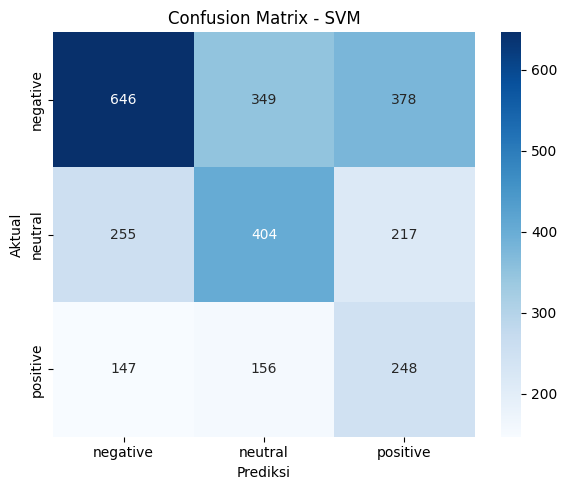

In [ ]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df_80 = pd.read_csv(
    '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skrpsi/Data baru/TFIDF_Versions/tfidf_split_80_20.csv'
)

X_80 = df_80.drop(columns=['sentiment', 'split_version', 'type'])
y_80 = df_80['sentiment']

X_train_80 = X_80[df_80['type'] == 'train'];  y_train_80 = y_80[df_80['type'] == 'train']
X_test_80  = X_80[df_80['type'] == 'test'];   y_test_80  = y_80[df_80['type'] == 'test']

model_80 = SVC(kernel='linear', C=1.0)
model_80.fit(X_train_80, y_train_80)
y_pred_80 = model_80.predict(X_test_80)

print(f"\nAkurasi 80:20 = {model_80.score(X_test_80, y_test_80)*100:.5f}%\n")
print(classification_report(y_test_80, y_pred_80, digits=2))

cm_80 = confusion_matrix(y_test_80, y_pred_80,
                         labels=['negative', 'neutral', 'positive'])
ConfusionMatrixDisplay(cm_80,
                       display_labels=['negative', 'neutral', 'positive']
                      ).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix – SVM Linear (80:20)')
plt.grid(False); plt.show()


**Linear 70:30**


Akurasi Model = 66.43%

Classification Report:
              precision  recall  f1-score  support
negative           0.75    0.67      0.71  1229.00
neutral            0.69    0.67      0.68  1020.00
positive           0.49    0.65      0.56   551.00
accuracy           0.66    0.66      0.66     0.66
macro avg          0.65    0.66      0.65  2800.00
weighted avg       0.68    0.66      0.67  2800.00


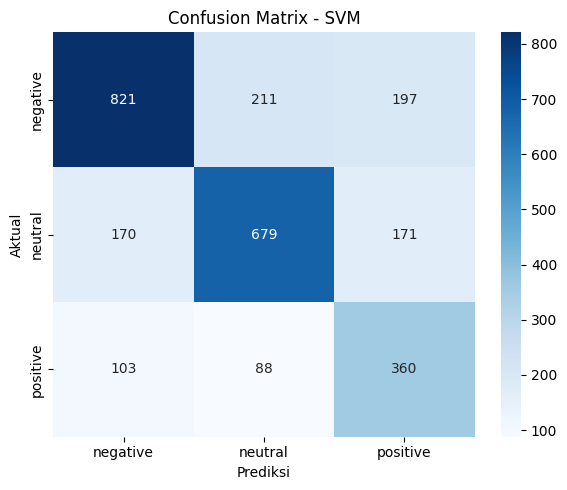

In [ ]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df_70 = pd.read_csv(
    '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skrpsi/Data baru/TFIDF_Versions/tfidf_split_70_30.csv'
)

X_70 = df_70.drop(columns=['sentiment', 'split_version', 'type'])
y_70 = df_70['sentiment']

X_train_70 = X_70[df_70['type'] == 'train'];  y_train_70 = y_70[df_70['type'] == 'train']
X_test_70  = X_70[df_70['type'] == 'test'];   y_test_70  = y_70[df_70['type'] == 'test']

model_70 = SVC(kernel='linear', C=1.0)
model_70.fit(X_train_70, y_train_70)
y_pred_70 = model_70.predict(X_test_70)

print(f"\nAkurasi 70:30 = {model_70.score(X_test_70, y_test_70)*100:.5f}%\n")
print(classification_report(y_test_70, y_pred_70, digits=2))

cm_70 = confusion_matrix(y_test_70, y_pred_70,
                         labels=['negative', 'neutral', 'positive'])
ConfusionMatrixDisplay(cm_70,
                       display_labels=['negative', 'neutral', 'positive']
                      ).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix – SVM Linear (70:30)')
plt.grid(False); plt.show()


**Linear 60:40**


Akurasi Model = 20.61%

Classification Report:
              precision  recall  f1-score  support
negative           0.25    0.21      0.22  1090.00
neutral            0.22    0.18      0.20  1016.00
positive           0.16    0.24      0.19   694.00
accuracy           0.21    0.21      0.21     0.21
macro avg          0.21    0.21      0.21  2800.00
weighted avg       0.22    0.21      0.21  2800.00


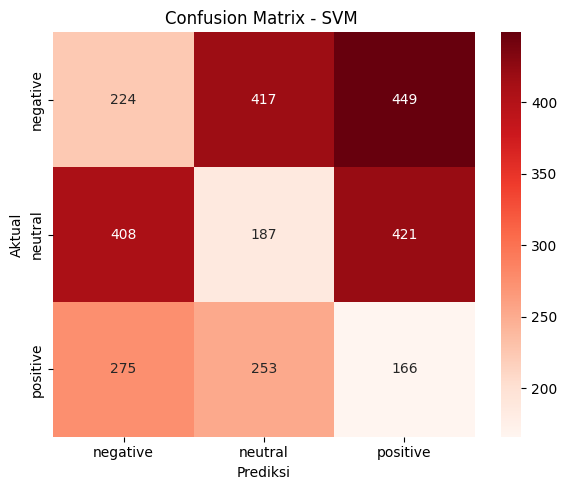

In [ ]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df_60 = pd.read_csv(
    '/content/drive/MyDrive/Ahmad Maulana Dani Akbar_skrpsi/Data baru/TFIDF_Versions/tfidf_split_60_40.csv'
)

X_60 = df_60.drop(columns=['sentiment', 'split_version', 'type'])
y_60 = df_60['sentiment']

X_train_60 = X_60[df_60['type'] == 'train'];  y_train_60 = y_60[df_60['type'] == 'train']
X_test_60  = X_60[df_60['type'] == 'test'];   y_test_60  = y_60[df_60['type'] == 'test']

model_60 = SVC(kernel='linear', C=1.0)
model_60.fit(X_train_60, y_train_60)
y_pred_60 = model_60.predict(X_test_60)

print(f"\nAkurasi 60:40 = {model_60.score(X_test_60, y_test_60)*100:.5f}%\n")
print(classification_report(y_test_60, y_pred_60, digits=2))

cm_60 = confusion_matrix(y_test_60, y_pred_60,
                         labels=['negative', 'neutral', 'positive'])
ConfusionMatrixDisplay(cm_60,
                       display_labels=['negative', 'neutral', 'positive']
                      ).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix – SVM Linear (60:40)')
plt.grid(False); plt.show()


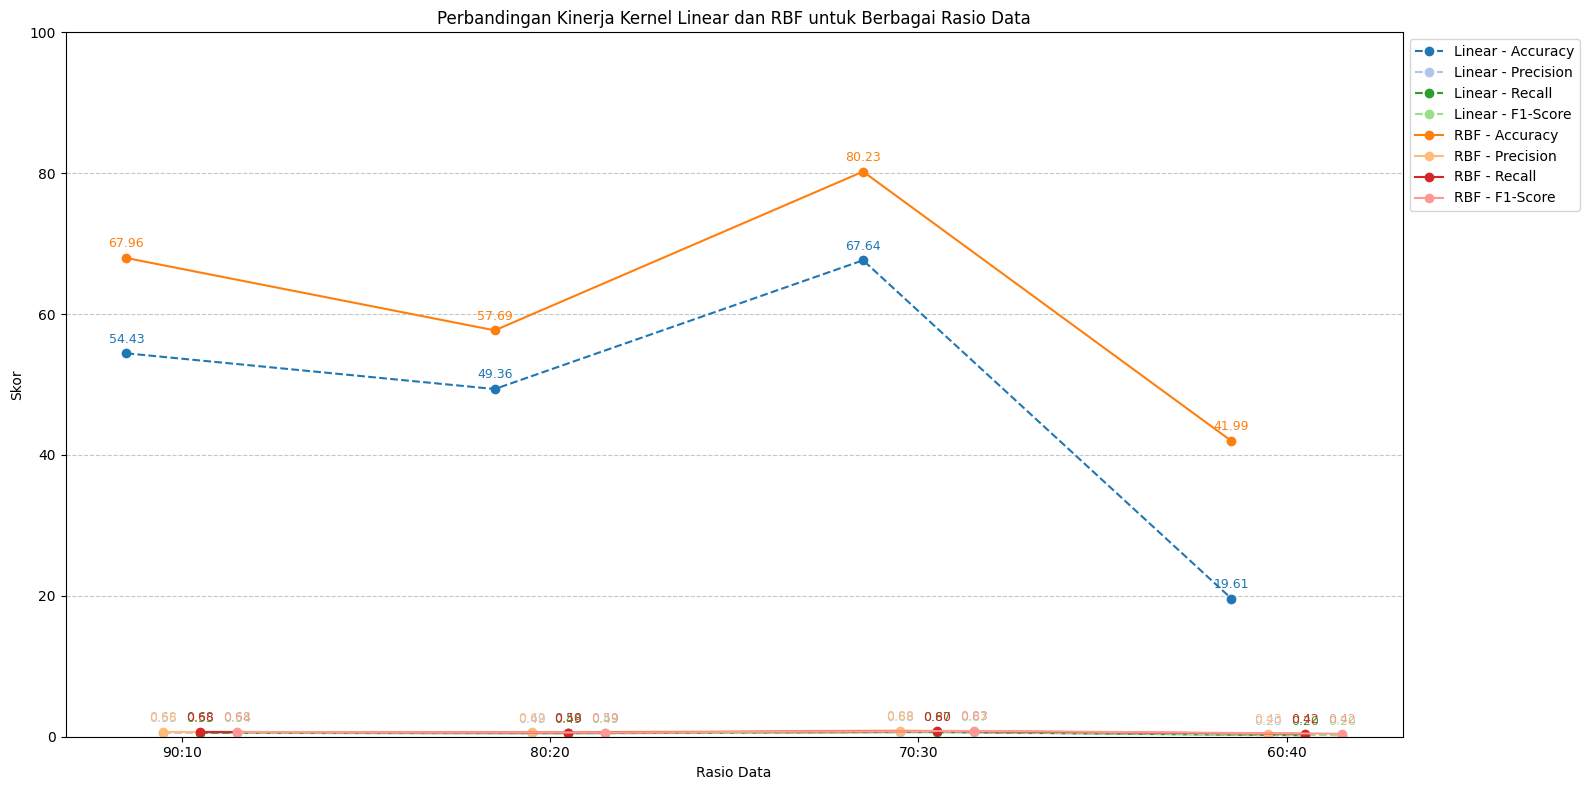

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# === Data dari keempat rasio ===
rasio = ['90:10', '80:20', '70:30', '60:40']
x_base = np.arange(len(rasio))  # posisi dasar X

# Linear kernel
linear_accuracy = [54.43, 49.36, 67.64, 19.61]
linear_precision = [0.55, 0.49, 0.68, 0.20]
linear_recall = [0.55, 0.49, 0.67, 0.20]
linear_f1 = [0.54, 0.49, 0.67, 0.20]

# RBF kernel
rbf_accuracy = [67.96, 57.69, 80.23, 41.99]
rbf_precision = [0.68, 0.62, 0.88, 0.43]
rbf_recall = [0.68, 0.58, 0.80, 0.42]
rbf_f1 = [0.68, 0.59, 0.83, 0.42]

# === Plotting ===
fig, ax = plt.subplots(figsize=(16, 8))

offset = [-0.15, -0.05, 0.05, 0.15]  # offset untuk tiap metrik agar tidak tumpang tindih

# === Linear Kernel ===
colors_linear = ['#1f77b4', '#aec7e8', '#2ca02c', '#98df8a']
metrics_linear = [linear_accuracy, linear_precision, linear_recall, linear_f1]
labels_linear = ['Linear - Accuracy', 'Linear - Precision', 'Linear - Recall', 'Linear - F1-Score']

for i, metric in enumerate(metrics_linear):
    x_offset = x_base + offset[i]
    ax.plot(x_offset, metric, linestyle='--', color=colors_linear[i], marker='o', label=labels_linear[i])
    for j in range(len(x_base)):
        ax.text(x_offset[j], metric[j] + 1.5, f'{metric[j]:.2f}', ha='center', fontsize=9, color=colors_linear[i])

# === RBF Kernel ===
colors_rbf = ['#ff7f0e', '#ffbb78', '#d62728', '#ff9896']
metrics_rbf = [rbf_accuracy, rbf_precision, rbf_recall, rbf_f1]
labels_rbf = ['RBF - Accuracy', 'RBF - Precision', 'RBF - Recall', 'RBF - F1-Score']

for i, metric in enumerate(metrics_rbf):
    x_offset = x_base + offset[i]
    ax.plot(x_offset, metric, linestyle='-', color=colors_rbf[i], marker='o', label=labels_rbf[i])
    for j in range(len(x_base)):
        ax.text(x_offset[j], metric[j] + 1.5, f'{metric[j]:.2f}', ha='center', fontsize=9, color=colors_rbf[i])

# Label dan tampilan
ax.set_xlabel('Rasio Data')
ax.set_ylabel('Skor')
ax.set_title('Perbandingan Kinerja Kernel Linear dan RBF untuk Berbagai Rasio Data')
ax.set_xticks(x_base)
ax.set_xticklabels(rasio)
ax.set_ylim(0, 100)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
